In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict

In [31]:
df = pd.read_csv('./data/NYPD_Arrest_Data__Year_to_Date_.csv')

In [32]:
for col in df.columns:
    print(f"Number of unique values in column {col}:  {len(df[col].unique())}")

Number of unique values in column ARREST_KEY:  112571
Number of unique values in column ARREST_DATE:  181
Number of unique values in column PD_CD:  244
Number of unique values in column PD_DESC:  233
Number of unique values in column KY_CD:  67
Number of unique values in column OFNS_DESC:  63
Number of unique values in column LAW_CODE:  923
Number of unique values in column LAW_CAT_CD:  6
Number of unique values in column ARREST_BORO:  5
Number of unique values in column ARREST_PRECINCT:  77
Number of unique values in column JURISDICTION_CODE:  22
Number of unique values in column AGE_GROUP:  5
Number of unique values in column PERP_SEX:  3
Number of unique values in column PERP_RACE:  7
Number of unique values in column X_COORD_CD:  22160
Number of unique values in column Y_COORD_CD:  23202
Number of unique values in column Latitude:  26457
Number of unique values in column Longitude:  26469
Number of unique values in column New Georeferenced Column:  26963


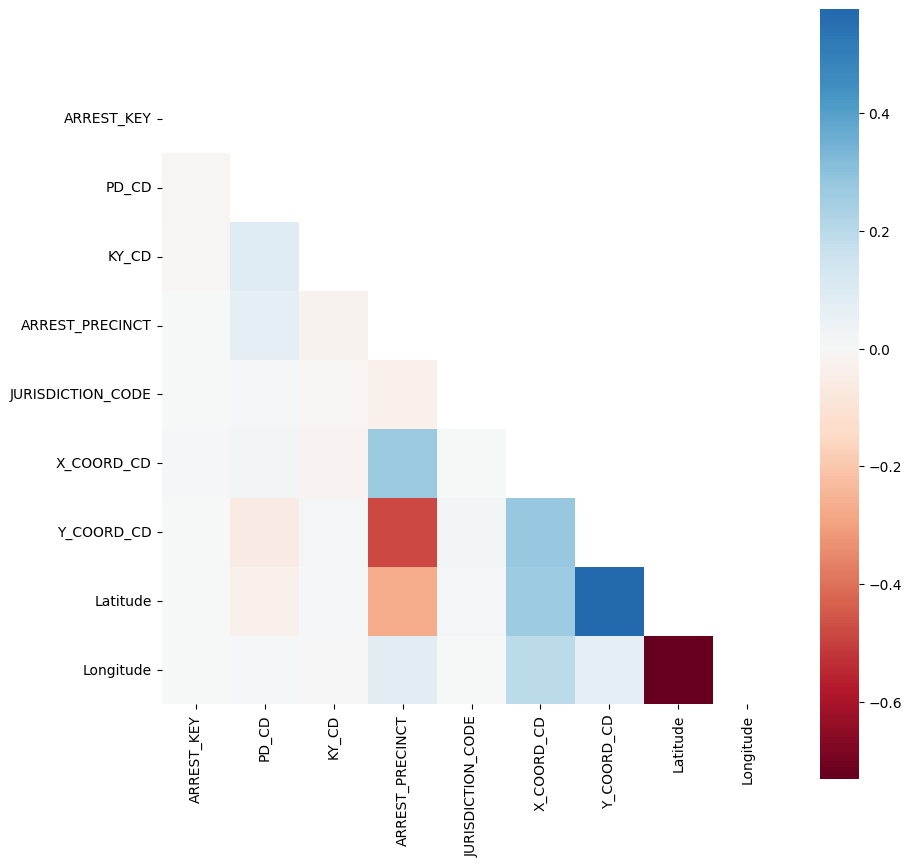

In [33]:
df_copy = df.select_dtypes('number')
corr = df_copy.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, cmap='RdBu', center=0,ax=ax, square=True, mask=matrix)
plt.show()

# Ques 1: What sins do different races often commit?

## Title here

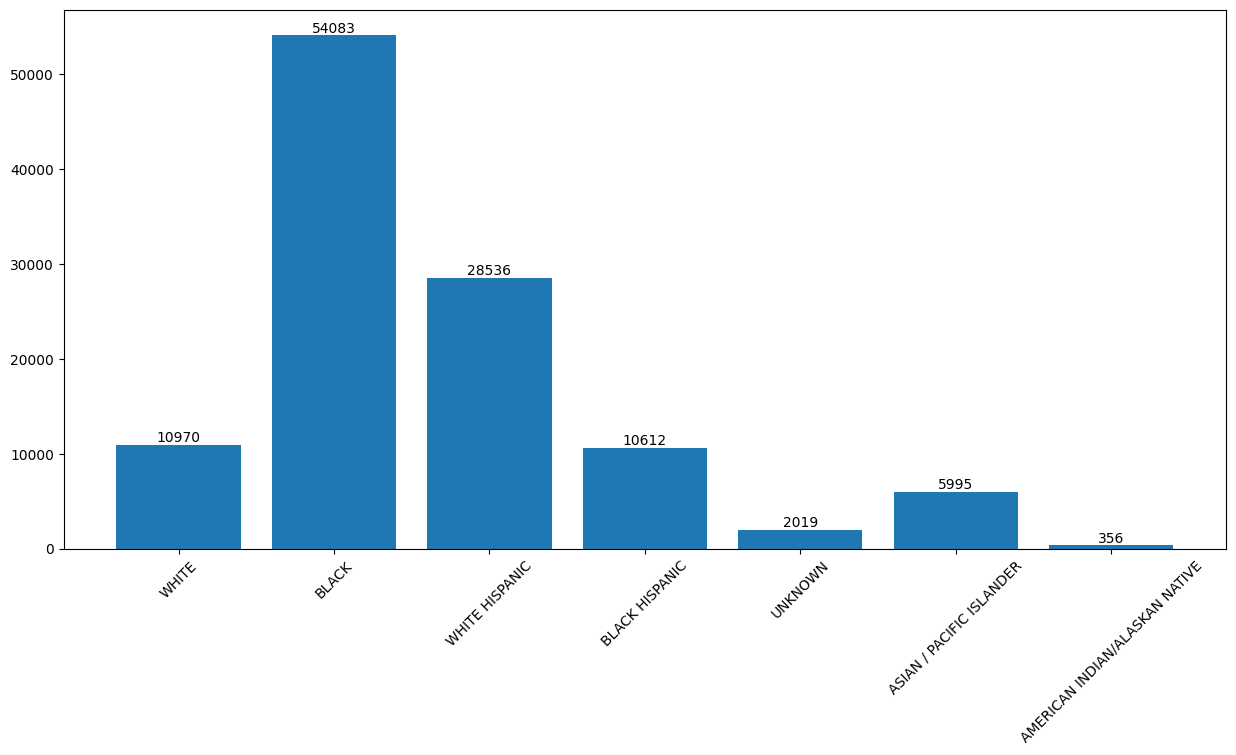

In [86]:
df_race = df.groupby('PERP_RACE')
race_dict = {}
for race in df['PERP_RACE'].unique():
    race_dict[race] = df_race.get_group(race)

plt.figure(figsize=(15, 7))
bar = plt.bar(race_dict.keys(), [len(race_dict[race]) for race in race_dict.keys()])
plt.bar_label(bar)
plt.xticks(rotation = 45)
plt.show()

## Title here

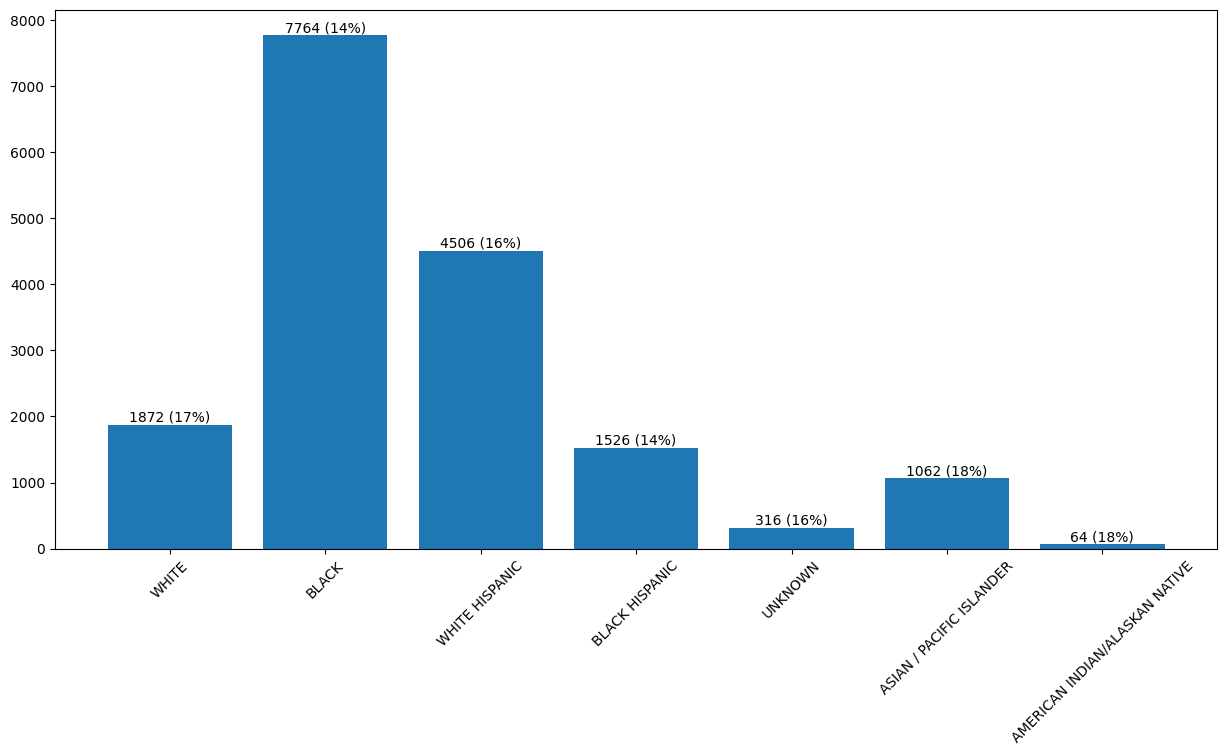

In [107]:

fig, ax = plt.subplots(figsize=(15, 7))
bar = ax.bar(race_dict.keys(), [race_dict[race]['OFNS_DESC'].value_counts().iloc[0] for race in race_dict.keys()])
x_labels = [str(round(race_dict[race]['OFNS_DESC'].value_counts().iloc[0])) + ' (' + 
            str(round(race_dict[race]['OFNS_DESC'].value_counts().iloc[0] * 100/len(race_dict[race]))) + '%)' for race in race_dict.keys()]
x_labels
rects = ax.patches

for rect, label in zip(rects, x_labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.xticks(rotation = 45)
plt.show()